# Lib import

In [1]:
import json
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from matplotlib.colors import ListedColormap
from tqdm import tqdm

In [2]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.4 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib

In [4]:
!pwd

/content


# Path

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
TRAIN_JSON_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/label/train/'
VALID_JSON_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/label/val/'

TRAIN_IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/img/train/'
VALID_IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/img/val/'

TRAIN_SEGMENT_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/segmentation/train/'
VALID_SEGMENT_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/segmentation/val/'

CSV_PATH = '/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/'

# 예시 파일 불러오기

## json

In [7]:
with open (TRAIN_JSON_PATH + "train_anger.json", "r", encoding='euc-kr') as f:
    data = json.load(f)

In [8]:
data[0]

{'filename': '6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63ec1162f5f6bfc6e481l.jpg',
 'gender': '남',
 'age': 30,
 'isProf': '일반인',
 'faceExp_uploader': '분노',
 'bg_uploader': '교통/이동수단(엘리베이터 포함)',
 'annot_A': {'boxes': {'maxX': 2073.2546049999996,
   'maxY': 1486.204442,
   'minX': 1338.2201049999999,
   'minY': 539.5066419999999},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'},
 'annot_B': {'boxes': {'maxX': 2074.6636049999997,
   'maxY': 1490.044442,
   'minX': 1341.270105,
   'minY': 528.132642},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'},
 'annot_C': {'boxes': {'maxX': 2072.188605,
   'maxY': 1487.918442,
   'minX': 1340.0851049999999,
   'minY': 525.650642},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'}}

In [9]:
data[0].keys()

dict_keys(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader', 'bg_uploader', 'annot_A', 'annot_B', 'annot_C'])

## img

In [10]:
image = cv2.imread(TRAIN_IMG_PATH + 'anger/' + data[0]['filename'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

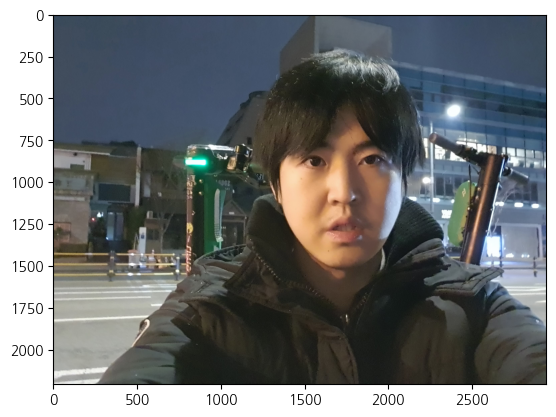

In [11]:
plt.imshow(image)

## npz

In [12]:
train_npz = np.load(TRAIN_SEGMENT_PATH + 'train_anger.npz')

#file_names = train_npz.files
file_name = data[0]['filename']
# mask = train_npz[file_name]

In [13]:
train_npz[file_name].shape

(2208, 2944)

In [14]:
colors = ['purple', 'yellow', 'red', 'green', 'blue', 'orange']
cmap = ListedColormap(colors)

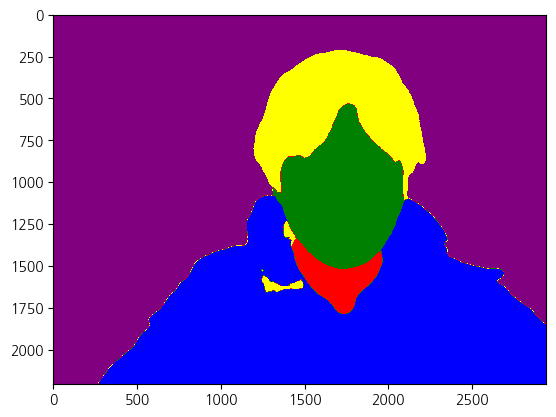

In [15]:
plt.imshow(train_npz[file_name], cmap=cmap, vmin=0, vmax=5)

보라색 0

노란색 1

빨간색 2

초록색 3

파란색 4

주황색 5

In [16]:
train_npz[file_name]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4]], dtype=uint8)

## background masking

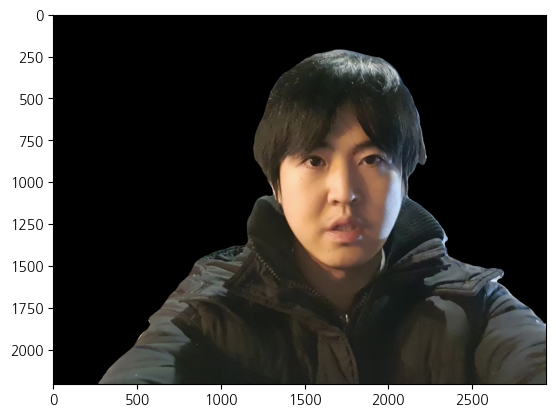

In [17]:
new_img = image.copy()
new_img[train_npz[file_name] == 0] = 0


plt.imshow(new_img)

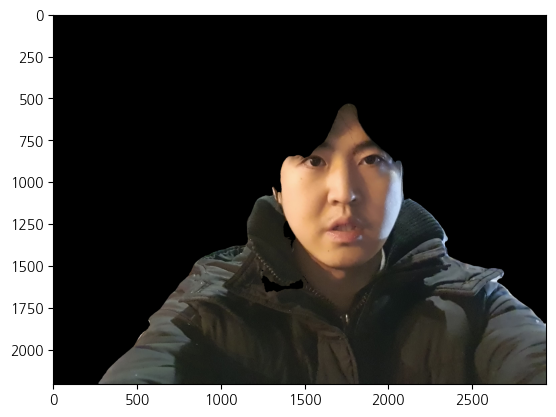

In [18]:
new_img[train_npz[file_name] == 1] = 0


plt.imshow(new_img)

In [19]:
image.shape

(2208, 2944, 3)

In [20]:
new_img.shape

(2208, 2944, 3)

## JSON TO CSV

In [21]:
from pandas import json_normalize

In [22]:
data[0]

{'filename': '6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63ec1162f5f6bfc6e481l.jpg',
 'gender': '남',
 'age': 30,
 'isProf': '일반인',
 'faceExp_uploader': '분노',
 'bg_uploader': '교통/이동수단(엘리베이터 포함)',
 'annot_A': {'boxes': {'maxX': 2073.2546049999996,
   'maxY': 1486.204442,
   'minX': 1338.2201049999999,
   'minY': 539.5066419999999},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'},
 'annot_B': {'boxes': {'maxX': 2074.6636049999997,
   'maxY': 1490.044442,
   'minX': 1341.270105,
   'minY': 528.132642},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'},
 'annot_C': {'boxes': {'maxX': 2072.188605,
   'maxY': 1487.918442,
   'minX': 1340.0851049999999,
   'minY': 525.650642},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'}}

In [23]:
json_to_csv = json_normalize(data)
json_to_csv

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63...,남,30,일반인,분노,교통/이동수단(엘리베이터 포함),2073.254605,1486.204442,1338.220105,539.506642,...,1341.270105,528.132642,분노,교통/이동수단(엘리베이터 포함),2072.188605,1487.918442,1340.085105,525.650642,분노,교통/이동수단(엘리베이터 포함)
1,65rsfe402042f34319e10128c1ab9614e2f967690a64a0...,남,40,전문인,분노,문화재 및 유적지,2889.526926,2306.348256,1812.222817,711.278453,...,1816.913391,688.002830,분노,공공시설/종교/의료,2902.734100,2300.207800,1783.704300,687.964400,분노,공공시설/종교/의료
2,b1cbe34734870cc11c33334e02bea93ac3a3b061caab62...,여,20,전문인,분노,오락/공연시설,1950.380119,1564.586938,1092.901126,565.437117,...,1011.849151,395.670259,불안,도심 환경,1953.119000,1569.929200,1061.689000,429.089300,슬픔,숙박 및 거주공간
3,llfycc0aa29599cc63cace3610fdaaad3a99aab2ee38c9...,여,50,일반인,분노,공공시설/종교/의료시설,849.400700,1153.137300,156.987700,289.183000,...,138.103869,316.337158,분노,공공시설/종교/의료,849.400700,1153.137300,156.987700,289.183000,분노,공공시설/종교/의료
4,3hww73b70615461a7336d0383b53582f8bf804f6e0f30d...,여,30,일반인,분노,상업시설/점포/시장,1402.888900,1383.816300,614.351500,295.559080,...,622.707997,301.142264,분노,오락/공연시설,1402.888900,1383.816300,614.351500,295.559080,분노,공공시설/종교/의료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,여,40,전문인,분노,실외 자연환경,2075.192400,1604.840914,1316.008500,515.588943,...,1298.760133,490.733934,슬픔,실외 자연환경,2075.161049,1604.844543,1307.558417,510.051332,불안,실외 자연환경
1496,6io429357a004d6e9d9858e9c97c993a78633403434364...,여,40,일반인,분노,숙박 및 거주공간,1952.873800,1483.373900,1305.516800,605.378800,...,1276.334089,573.419268,분노,숙박 및 거주공간,1952.873800,1483.373900,1305.516800,605.378800,분노,숙박 및 거주공간
1497,0tj25997789690fd794f341e6a4a67e36010101688bef0...,남,20,일반인,분노,상업시설/점포/시장,1814.245700,1223.343500,1032.791900,265.025760,...,1012.609221,346.446889,분노,상업시설/점포/시장,1841.184517,1316.857067,1016.736908,293.949615,분노,상업시설/점포/시장
1498,88oia7ac423f30f3767186eca94cc04702847519a7c16a...,여,20,일반인,분노,교통/이동수단(엘리베이터 포함),1764.386826,1143.669262,1094.868224,219.091746,...,1086.115200,239.490170,불안,교통/이동수단(엘리베이터 포함),1779.042200,1090.823700,1086.115200,239.490170,분노,교통/이동수단(엘리베이터 포함)


In [25]:
with open (VALID_JSON_PATH + "val_anger.json", "r", encoding='euc-kr') as f:
    val_data_anger = json.load(f)

In [26]:
with open (VALID_JSON_PATH + "val_sadness.json", "r", encoding='euc-kr') as f:
    val_data_sadness = json.load(f)

In [27]:
with open (VALID_JSON_PATH + "val_panic.json", "r", encoding='euc-kr') as f:
    val_data_panic = json.load(f)

In [28]:
with open (VALID_JSON_PATH + "val_happy.json", "r", encoding='euc-kr') as f:
    val_data_happy = json.load(f)

In [29]:
json_to_csv_a = json_normalize(val_data_anger)
json_to_csv_a

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,7uji1c8ab7778bc286c3cd90077847f9a906f00b210838...,남,40,전문인,분노,오락/공연시설,2333.655000,1321.890300,1635.013000,333.644780,...,1596.742767,3.336448e+02,분노,오락/공연시설,2333.655000,1321.890300,1635.013000,333.644780,분노,오락/공연시설
1,qokw201acdd0f74c7794a9ddcbc9cabdf9c79dd711cbed...,여,20,전문인,분노,실외 자연환경,1697.420898,1640.031806,963.564059,708.075046,...,949.865299,7.080387e+02,분노,실외 자연환경,1725.118791,1712.316500,937.040010,708.275200,분노,실외 자연환경
2,tzg8926848c43051598de35ece59588857ce02af169954...,여,20,일반인,분노,교통/이동수단(엘리베이터 포함),2078.563500,1241.851000,1171.624000,0.334618,...,1215.306021,0.000000e+00,분노,교통/이동수단(엘리베이터 포함),2078.563500,1241.851000,1171.624000,0.334618,분노,교통/이동수단(엘리베이터 포함)
3,w4vh9e941e6c400f03df009496eaa1f639e73d8ec8104c...,여,20,일반인,분노,숙박 및 거주공간,1921.776100,1827.133400,889.979740,531.482300,...,889.979740,5.314823e+02,분노,숙박 및 거주공간,1921.867044,1827.133400,913.762480,531.482300,분노,숙박 및 거주공간
4,qii07233b67c5d41cb109e19d2d14309cb177b43f40698...,남,30,전문인,분노,실외 자연환경,2855.292176,2190.112808,1905.411155,997.176327,...,1909.800000,8.321684e+02,분노,실외 자연환경,2876.159356,2189.518040,1934.539946,814.459682,분노,실외 자연환경
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,q3cf008378ff320290d0bf53ffbffc70d567f1118e0b14...,여,20,일반인,분노,교통/이동수단(엘리베이터 포함),2387.046900,920.057900,1579.817900,0.000000,...,1649.925036,0.000000e+00,불안,도심 환경,2401.727923,954.814688,1634.923495,0.109500,슬픔,도심 환경
296,spbz8b8eca388f8770739d41c8868733eaa38a933af83f...,여,30,전문인,분노,상업시설/점포/시장,1803.846800,2114.498800,497.502800,265.807000,...,492.407426,1.861942e-13,분노,상업시설/점포/시장,1803.846800,2098.602954,497.502800,111.155690,분노,상업시설/점포/시장
297,byto38055087853eb56aa5850633bc83f524732930e287...,남,20,전문인,분노,도심 환경,1965.086700,1717.991100,1225.052000,713.013850,...,1247.295225,7.130139e+02,불안,숙박 및 거주공간,1952.286367,1717.991100,1231.410228,713.013850,당황,숙박 및 거주공간
298,i9xy32572be5633c5aa629866522145c3c265446b38710...,여,30,일반인,분노,실외 자연환경,2327.540341,2118.638735,1236.854359,580.101845,...,1245.244767,5.688861e+02,상처,실외 자연환경,2302.032941,2086.471366,1262.361759,567.119214,불안,실외 자연환경


In [30]:
json_to_csv_s = json_normalize(val_data_sadness)
json_to_csv_s

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,qwah77a0193244b0482281a281fc40efaf821fcbbcd89b...,여,50,전문인,슬픔,도심 환경,1959.856577,1270.481400,1283.264856,321.984830,...,1290.585895,300.712976,상처,도심 환경,1973.282810,1280.446147,1287.016830,295.196260,상처,도심 환경
1,nkm368d6e713877d5833435d5891e8cf73d683184f536f...,남,30,일반인,슬픔,공공시설/종교/의료시설,1790.001269,1385.508760,995.402462,333.418364,...,988.169067,276.588640,중립,실외 자연환경,1792.752661,1402.238300,988.697041,279.090005,분노,실외 자연환경
2,l03pc556d534a0336462a1f3499313bb553a9ccaa4dc31...,남,20,전문인,슬픔,상업시설/점포/시장,1881.914200,1400.382400,1059.491100,415.956240,...,1102.295759,416.158746,슬픔,상업시설/점포/시장,1876.175568,1452.724636,1073.945921,488.540250,슬픔,상업시설/점포/시장
3,uk8849444ada058ba43d43a73fd8bc37fc5ba4c48623e2...,여,40,일반인,슬픔,공공시설/종교/의료시설,2490.932100,1895.819300,1594.589200,744.300900,...,1594.524624,725.616956,슬픔,공공시설/종교/의료,2490.932100,1895.819300,1594.589200,744.300900,슬픔,공공시설/종교/의료
4,we5x47511a48ae6fe6540d491995a09470a46e07046b0b...,여,30,전문인,슬픔,공공시설/종교/의료시설,1435.047773,1526.698893,549.028320,282.883831,...,537.832307,278.902222,불안,공공시설/종교/의료,1435.084000,1502.804900,556.978300,278.826100,슬픔,공공시설/종교/의료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,rjnkda096395f7d64d799dd776d9c7fd5c064d5323d4e4...,남,20,전문인,슬픔,실외 자연환경,2065.214800,1580.294900,1467.155400,773.288500,...,1486.537823,792.684171,중립,실외 자연환경,2065.214800,1580.294900,1467.155400,773.288500,슬픔,오락/공연시설
296,aozh8c79c715b4bde49b1dee219515dafee8d18fbd44a2...,여,30,전문인,슬픔,상업시설/점포/시장,2168.068000,1560.554000,1254.728500,313.908630,...,1295.854047,291.106666,불안,상업시설/점포/시장,2186.931836,1560.394885,1278.262642,271.642892,불안,상업시설/점포/시장
297,lwkbf9c073e9666771bc7893bff372b3b5f79bb412b717...,여,20,일반인,슬픔,행사/사무공간,2482.920700,1329.426400,1558.206900,215.643650,...,1558.236159,215.643650,불안,행사/사무공간,2493.814630,1351.224915,1558.249679,215.714767,슬픔,행사/사무공간
298,0plkdd5adf9d87dce557a9db940467c26090e1d686f908...,여,30,전문인,슬픔,오락/공연시설,2307.119600,1739.276000,1465.970100,549.161600,...,1465.970100,504.903476,불안,행사/사무공간,2307.119600,1731.344534,1465.970100,549.135171,상처,오락/공연시설


In [31]:
json_to_csv_p = json_normalize(val_data_panic)
json_to_csv_p

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,5wvv711e387717375fc2d050c253bddc47f702574e5d4e...,남,30,일반인,당황,숙박 및 거주공간,2669.370000,1424.255700,1812.733900,294.916700,...,1805.854777,436.571172,당황,행사/사무공간,2669.370000,1424.255700,1812.733900,294.916700,당황,숙박 및 거주공간
1,bah3e6ebf4124d8dd4a76c5624072dc082d5f062a8cc42...,여,30,전문인,당황,상업시설/점포/시장,2095.222644,1604.340452,1339.350696,532.064009,...,1304.791900,476.170260,당황,상업시설/점포/시장,2095.106200,1604.209000,1304.791600,476.170470,당황,상업시설/점포/시장
2,w29v711b8e595b16be3990c859815fe7b6ee0c1110c112...,여,20,일반인,당황,공공시설/종교/의료시설,3279.494384,2278.886400,2021.510384,479.001600,...,2020.788300,485.602778,불안,도심 환경,3260.471113,2289.461203,2016.711013,1012.111508,당황,공공시설/종교/의료
3,f7xt648b78b2d283a1e8d72d608857817e2e7e169c286a...,여,30,전문인,당황,실외 자연환경,2664.621000,1454.687100,1677.424200,170.709810,...,1686.227988,162.055049,상처,실외 자연환경,2664.621000,1454.687100,1677.424200,170.709810,상처,실외 자연환경
4,y4n7ec880686e6168d2c7b8070bf8df98caa216ab13886...,남,20,전문인,당황,공공시설/종교/의료시설,2272.420400,1831.783600,1474.894900,870.321200,...,1466.099759,932.127240,분노,공공시설/종교/의료,2272.420400,1831.783600,1474.894900,870.321200,상처,공공시설/종교/의료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,ka0t4855590268311c00a08dbb040e99f520dd090e91b1...,여,30,전문인,당황,숙박 및 거주공간,2277.124000,1578.518100,1505.314800,546.860100,...,1509.314800,566.890879,당황,숙박 및 거주공간,2286.733996,1581.689302,1502.146909,534.025740,당황,숙박 및 거주공간
296,6u8g5d57508b9786be55a3e9a2093a55b6d29aa4b65df7...,여,30,전문인,당황,교통/이동수단(엘리베이터 포함),1268.271100,1574.226430,653.845200,656.536630,...,647.428706,654.466089,당황,교통/이동수단(엘리베이터 포함),1268.271100,1530.630100,653.845200,612.940300,당황,교통/이동수단(엘리베이터 포함)
297,2llq785f52ab7f72f21b0bebf4d6d1491c50c14bf2cc44...,남,30,전문인,당황,공공시설/종교/의료시설,2537.315700,1392.988400,1732.962900,371.814450,...,1755.170072,371.814450,당황,공공시설/종교/의료,2466.915615,1392.988400,1774.373511,371.814450,당황,공공시설/종교/의료
298,r4zua44b17e2774c99e212a246c5ae5452645ba7953a44...,남,20,전문인,당황,스포츠 관람 및 레저시설,2170.111800,1641.351400,1300.537600,551.296200,...,1300.488014,662.788179,상처,오락/공연시설,2164.536042,1611.174211,1294.961842,712.503692,당황,오락/공연시설


In [32]:
json_to_csv_h = json_normalize(val_data_happy)
json_to_csv_h

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,toq8051c689cc18111cbe3eb6e976bbcb917dc787e868f...,남,20,일반인,기쁨,상업시설/점포/시장,3337.372800,1548.544100,2421.297400,503.923700,...,2399.820488,491.020708,기쁨,상업시설/점포/시장,3396.792252,1573.393920,2436.452547,528.773520,기쁨,행사/사무공간
1,7buz79e78c54eefc8ce51f75e363e5356fcc35f7cdb797...,여,20,일반인,기쁨,실외 자연환경,1153.529000,751.747800,848.369000,298.870450,...,842.768174,275.939474,기쁨,공공시설/종교/의료,1161.253097,753.642837,840.644903,287.207474,기쁨,도심 환경
2,cdxmfebe8892936b85394c3878134b1e1a3a8a28865763...,여,30,일반인,기쁨,도심 환경,2547.787431,1618.156000,1704.132659,572.763000,...,1704.017600,572.763000,기쁨,도심 환경,2518.741200,1618.156000,1704.017600,572.763000,기쁨,교통/이동수단(엘리베이터 포함)
3,n0kmf7a95be77c999b0e788bf81ee337979a7e78734985...,여,30,일반인,기쁨,교통/이동수단(엘리베이터 포함),1288.622900,1345.767800,548.287300,349.689730,...,548.385866,349.775406,기쁨,교통/이동수단(엘리베이터 포함),1288.622900,1345.767800,548.287300,349.689730,기쁨,교통/이동수단(엘리베이터 포함)
4,agxl9759549b79b0fecb5b0d604fe0089bf2d95b930ebf...,남,30,일반인,기쁨,실외 자연환경,2246.087000,1357.674300,1614.133900,467.819370,...,1602.438433,482.572862,기쁨,실외 자연환경,2257.329756,1370.535211,1596.074223,469.158954,기쁨,실외 자연환경
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,nuqk614116585fe1b62e6c1e2661477cb463674c281625...,여,30,전문인,기쁨,오락/공연시설,823.849899,681.937740,529.517850,291.841160,...,529.507776,272.314765,기쁨,오락/공연시설,822.536505,681.883484,529.485828,275.895476,기쁨,오락/공연시설
296,pbk161d4d775439aaa0d35e9db2ee961feeeefe3fa3e67...,남,40,일반인,기쁨,교통/이동수단(엘리베이터 포함),2239.354609,1621.452244,1335.381509,489.030614,...,1332.462509,469.208614,기쁨,교통/이동수단(엘리베이터 포함),2225.884609,1629.987244,1345.424509,480.107614,기쁨,교통/이동수단(엘리베이터 포함)
297,ldjnc503161260a7893e337a5c16242562246842cdec96...,남,20,전문인,기쁨,공공시설/종교/의료시설,1867.711628,1605.151830,966.799428,511.741993,...,992.263612,500.652978,기쁨,도심 환경,1847.317169,1655.623076,992.494826,481.760466,기쁨,공공시설/종교/의료
298,luoza7d007b05df31009565855560d0852e57c7790b831...,여,20,일반인,기쁨,도심 환경,2714.274400,1127.801300,1895.192400,66.020200,...,1929.735244,39.529412,기쁨,도심 환경,2707.176251,1167.734043,1931.455106,58.891904,기쁨,숙박 및 거주공간


In [33]:
data_val = pd.concat([json_to_csv_a, json_to_csv_s, json_to_csv_p, json_to_csv_h], ignore_index=True)

In [34]:
data_val.to_csv(CSV_PATH + 'valid.csv')

# EDA

## 전체적인 정보

In [35]:
df = pd.read_csv(CSV_PATH + 'train.csv')

In [36]:
df_val = pd.read_csv(CSV_PATH + 'valid.csv')

In [37]:
df.head(5)

,Unnamed: 0,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,0,1ssf46b4695747c6e323bf090389b57049cff58a0851d5...,남,50,일반인,기쁨,실외 자연환경,2080.465000,1655.189800,1383.671900,...,1383.671900,815.226836,기쁨,실외 자연환경,2080.46500,1655.189800,1383.67190,719.384700,기쁨,실외 자연환경
1,1,hfbl2d0622517ad6ef5456d1fa4e7d52f57ff1dff32094...,남,20,일반인,기쁨,실외 자연환경,937.669830,822.907783,471.411790,...,471.302790,279.082133,기쁨,실외 자연환경,935.07283,824.604783,472.94479,275.735134,기쁨,실외 자연환경
2,2,eg9e62a9cfcd9eabbe75c79dd12d99e99cdd9960ba9daf...,여,20,전문인,기쁨,실외 자연환경,1797.952500,1115.873500,1171.371700,...,1185.662855,309.106598,기쁨,실외 자연환경,1797.95250,1115.873500,1171.37170,317.707340,기쁨,실외 자연환경
3,3,w0l5595485285b029508299b09d058cb30ebcd29459c52...,남,20,일반인,기쁨,교통/이동수단(엘리베이터 포함),1663.261855,1579.161600,840.119455,...,849.155188,550.287645,기쁨,교통/이동수단(엘리베이터 포함),1659.03740,1535.617000,807.66656,527.568540,기쁨,교통/이동수단(엘리베이터 포함)
4,4,4g3x46eb8169fa9c636ecfe93eac6996299ca02d6596c3...,여,30,전문인,기쁨,상업시설/점포/시장,1927.386601,1539.205364,1065.494209,...,1077.014106,282.111354,기쁨,공공시설/종교/의료,1915.33250,1536.345800,1095.86410,338.723700,기쁨,상업시설/점포/시장


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5994 non-null   int64  
 1   filename            5994 non-null   object 
 2   gender              5994 non-null   object 
 3   age                 5994 non-null   int64  
 4   isProf              5994 non-null   object 
 5   faceExp_uploader    5994 non-null   object 
 6   bg_uploader         5994 non-null   object 
 7   annot_A.boxes.maxX  5994 non-null   float64
 8   annot_A.boxes.maxY  5994 non-null   float64
 9   annot_A.boxes.minX  5994 non-null   float64
 10  annot_A.boxes.minY  5994 non-null   float64
 11  annot_A.faceExp     5994 non-null   object 
 12  annot_A.bg          5994 non-null   object 
 13  annot_B.boxes.maxX  5994 non-null   float64
 14  annot_B.boxes.maxY  5994 non-null   float64
 15  annot_B.boxes.minX  5994 non-null   float64
 16  annot_

In [39]:
df.describe()

,Unnamed: 0,age,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY
count,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000
mean,748.752252,26.359693,1999.564140,1565.925726,1181.364668,471.422900,2000.200167,1573.004738,1187.593034,469.444084,2000.582115,1569.285189,1183.196105,467.329333
std,432.619578,8.142815,552.972987,361.436705,465.150084,230.424035,551.176816,362.043069,463.704543,231.800391,551.441409,361.745453,464.316150,229.972927
min,0.000000,10.000000,0.000000,-146.849315,-221.238095,-219.047619,358.857153,390.153586,-29.669287,-204.783196,361.199153,386.673586,-23.264287,-218.876196
25%,374.000000,20.000000,1678.450582,1356.652852,894.795301,306.251539,1680.702606,1362.304113,902.994928,304.120602,1679.654293,1356.438807,898.585521,302.030012
50%,749.000000,20.000000,1972.583400,1564.844029,1142.722839,446.400285,1973.449288,1571.676377,1150.266791,442.009864,1974.347300,1567.065450,1142.437130,442.046767
75%,1123.000000,30.000000,2316.682200,1761.245850,1464.023284,610.978813,2318.284839,1770.035780,1472.094083,606.366761,2317.105173,1766.514506,1466.270779,605.048182
max,1499.000000,60.000000,6173.397500,4496.241728,3940.014200,1806.427925,6133.700638,4473.020527,3977.775263,1769.805319,6173.397500,4488.447814,3947.502228,1753.839573


In [40]:
df[(df['annot_B.boxes.minX']<0) | (df['annot_B.boxes.minY']<0) | (df['annot_B.boxes.maxX']<50) | (df['annot_B.boxes.maxY']<50) | (df['annot_B.boxes.maxX']-df['annot_B.boxes.minX']<50) | (df['annot_B.boxes.maxY']-df['annot_B.boxes.minY']<50) | (df['annot_B.boxes.maxY']>5000) | (df['annot_B.boxes.maxX']>5000)]

,Unnamed: 0,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
189,189,341zcc976a81d9d8391dbdc967042a4977d9c594b924ad...,남,20,일반인,기쁨,공공시설/종교/의료시설,965.926647,861.093359,257.711377,...,265.313377,-20.468709,기쁨,공공시설/종교/의료시설,962.172647,857.736359,261.228377,-36.482709,기쁨,공공시설/종교/의료시설
717,717,nxum113d67a2a44cd64ca1adb73571cec97e2683e646a3...,남,30,전문인,기쁨,숙박 및 거주공간,5218.583000,3569.656500,3281.753400,...,3346.176989,924.677906,기쁨,교통/이동수단(엘리베이터 포함),5178.952827,3552.615133,3361.515586,907.686389,기쁨,교통/이동수단(엘리베이터 포함)
906,906,g5w25125c4043f1465e9eee41a94aad1b5fc62636c5744...,남,30,전문인,기쁨,상업시설/점포/시장,5018.515600,3276.807900,3350.765600,...,3350.765600,894.725129,기쁨,상업시설/점포/시장,5018.515600,3321.416596,3350.765600,979.477396,기쁨,상업시설/점포/시장
1169,1169,0pmy4461b7443481c185deb28f4e1e7645c55655e2f64d...,남,30,전문인,기쁨,숙박 및 거주공간,5251.373500,3361.364700,3643.899400,...,3554.756543,1077.289173,기쁨,도심 환경,5179.225053,3390.249896,3543.247847,1059.514104,기쁨,도심 환경
1381,1381,yfsed1953575246e23a5d5636224137411614645761f70...,남,30,전문인,기쁨,교통/이동수단(엘리베이터 포함),5154.925000,3116.600800,3431.514000,...,3424.194677,741.644019,기쁨,교통/이동수단(엘리베이터 포함),5154.925000,3116.600800,3431.514000,805.953500,기쁨,교통/이동수단(엘리베이터 포함)
1619,125,9rzj2ff6822f42cef0544243362f0f4f2e08fdffff9a74...,여,20,일반인,분노,상업시설/점포/시장,1500.189177,669.503384,872.514877,...,870.178877,-204.783196,분노,상업시설/점포/시장,1493.264177,672.315384,868.073877,-218.876196,분노,상업시설/점포/시장
1784,290,yt5u479adfcb878ba8f1e34ebd372fefd679865e835be7...,남,20,전문인,분노,도심 환경,6119.238300,4205.241700,3886.870600,...,3965.816795,936.583150,분노,도심 환경,6111.862146,4273.657497,3947.502228,932.257006,분노,실외 자연환경
1804,310,fper3db11fef98f236117e11df9f5ad4a93e1c9bf2172b...,여,30,전문인,분노,교통/이동수단(엘리베이터 포함),1795.416300,1639.407291,1004.002560,...,682.774300,978.443100,분노,도심 환경,1801.486598,1639.294315,1000.984894,523.621353,분노,도심 환경
1824,330,9qym03e7676473c660ef36f0fdb6f6e9aed6bd22461f82...,남,20,전문인,분노,숙박 및 거주공간,5125.644500,3876.057400,3318.467800,...,3413.082189,1308.808995,분노,숙박 및 거주공간,5192.163591,4008.573418,3413.168813,1365.409429,분노,숙박 및 거주공간
1968,474,inmq817db362de0277873344bbf8f594d6a9fe27181164...,남,20,전문인,분노,공공시설/종교/의료시설,5504.930154,3881.928552,3551.173767,...,3442.047761,1030.005708,분노,공공시설/종교/의료,5504.703600,3904.006046,3494.714400,878.661154,분노,공공시설/종교/의료


In [41]:
df['gender'].unique()

array(['남', '여'], dtype=object)

In [42]:
df['isProf'].unique()

array(['일반인', '전문인'], dtype=object)

In [43]:
df['faceExp_uploader'].unique()

array(['기쁨', '분노', '슬픔', '당황'], dtype=object)

In [44]:
df['bg_uploader'].unique()

array(['실외 자연환경', '교통/이동수단(엘리베이터 포함)', '상업시설/점포/시장', '도심 환경',
       '공공시설/종교/의료시설', '행사/사무공간', '숙박 및 거주공간', '오락/공연시설', '문화재 및 유적지',
       '스포츠 관람 및 레저시설'], dtype=object)

## 남녀 비율

In [45]:
import seaborn as sns

([<matplotlib.patches.Wedge at 0x7913f030f1c0>,
 [Text(0.13743185502273644, 1.0913809991130548, 'male'),
  Text(-0.13743195720520007, -1.091380986245751, 'female')],
 [Text(0.07496283001240168, 0.5952987267889389, '46.0%'),
  Text(-0.07496288574829094, -0.5952987197704096, '54.0%')])

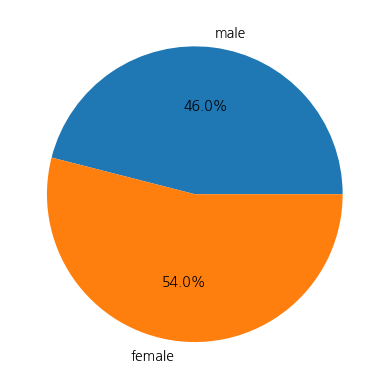

In [46]:
data = [len(df[df['gender']=='남']),len(df[df['gender']=='여'])]
labels = ['male','female']
plt.pie(data, labels = labels, autopct='%.1f%%')

## 전문인 비율

([<matplotlib.patches.Wedge at 0x7913f036a020>,
 [Text(0.10936076175142512, 1.09455023812941, 'prof'),
  Text(-0.10936086423061396, -1.0945502278903119, 'norm')],
 [Text(0.059651324591686414, 0.5970274026160418, '46.8%'),
  Text(-0.05965138048942579, -0.5970273970310791, '53.2%')])

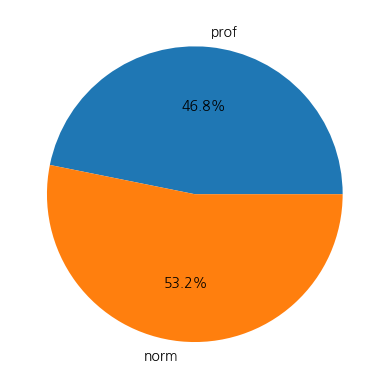

In [47]:
data = [len(df[df['isProf']=='전문인']),len(df[df['isProf']=='일반인'])]
labels = ['prof','norm']
plt.pie(data, labels = labels, autopct='%.1f%%')

## 감정 비율

([<matplotlib.patches.Wedge at 0x791405067fa0>,
 [Text(0.7796498168394428, 0.7759807749565858, 'happy'),
  Text(-0.7747539199828732, 0.7808689797086141, 'anger'),
  Text(-0.7796498168394428, -0.7759807749565858, 'sadness'),
  Text(0.777205711442099, -0.7784287264109546, 'panic')],
 [Text(0.42526353645787784, 0.42326224088541037, '24.92%'),
  Text(-0.42259304726338537, 0.42592853438651673, '25.03%'),
  Text(-0.42526353645787784, -0.42326224088541037, '25.03%'),
  Text(0.42393038805932676, -0.4245974871332479, '25.03%')])

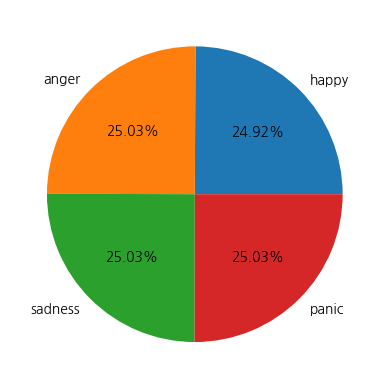

In [48]:
data = [len(df[df['faceExp_uploader']=='기쁨']),len(df[df['faceExp_uploader']=='분노']), len(df[df['faceExp_uploader']=='슬픔']), len(df[df['faceExp_uploader']=='당황'])]
labels = ['happy','anger','sadness','panic']
plt.pie(data, labels = labels, autopct='%.2f%%')

## 배경 비율

<Axes: xlabel='bg_uploader', ylabel='bg_uploader'>

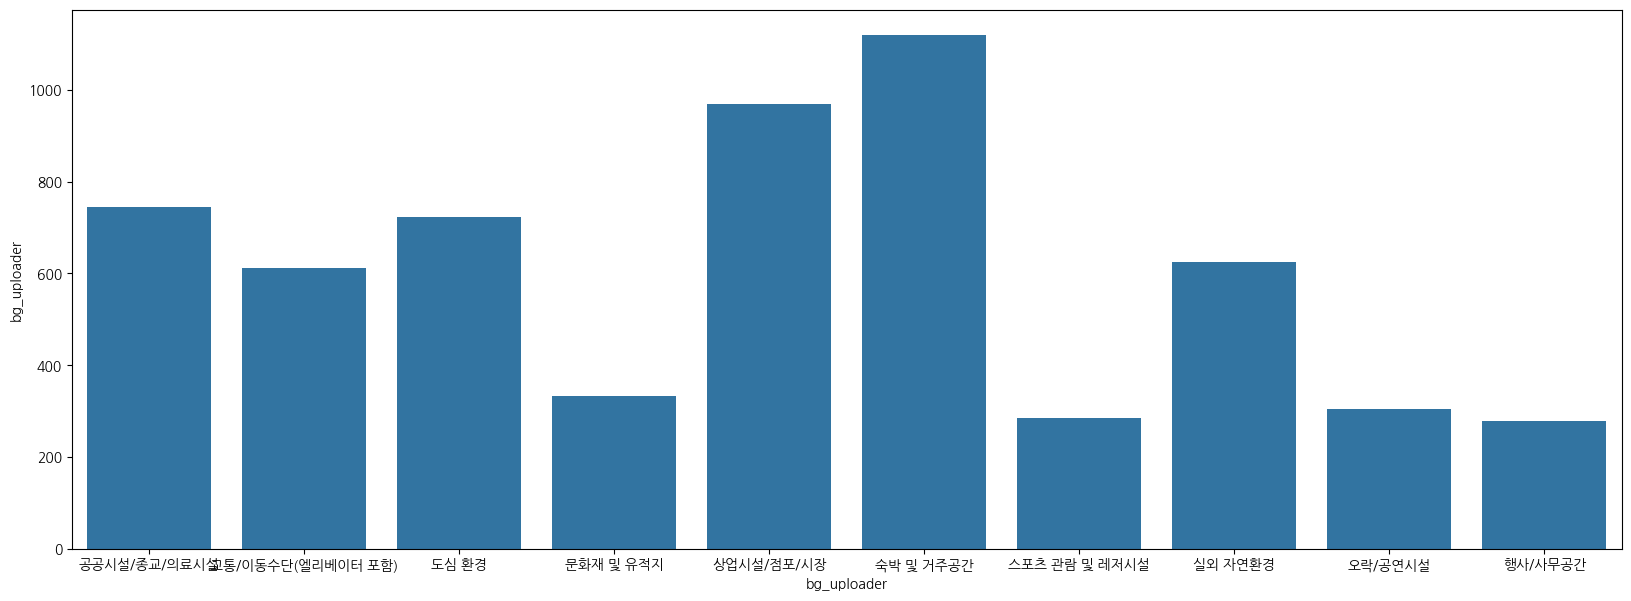

In [49]:
fig = plt.figure(figsize = (20,7))
sns.barplot(x=df.groupby('bg_uploader')[['bg_uploader']].count().index, y="bg_uploader", data=df.groupby('bg_uploader')[['bg_uploader']].count())

## Labeling

In [50]:
gender = {'여':0, '남':1}
is_prof = {'일반인':0, '전문인':1}
bg = {'실외 자연환경':0, '교통/이동수단(엘리베이터 포함)':1, '상업시설/점포/시장':2, '도심 환경':3,
       '공공시설/종교/의료시설':4, '행사/사무공간':5, '숙박 및 거주공간':6, '오락/공연시설':7, '문화재 및 유적지':8,
       '스포츠 관람 및 레저시설':9}
emotion = {'기쁨':0, '분노':1, '슬픔':2, '당황':3}

In [51]:
df_label = df.copy()
df_label['gender'] = df['gender'].map(gender)
df_label['isProf'] = df['isProf'].map(is_prof)
df_label['bg_uploader'] = df['bg_uploader'].map(bg)
df_label['faceExp_uploader'] = df['faceExp_uploader'].map(emotion)

In [52]:
df_val_label = df_val.copy()
df_val_label['gender'] = df_val['gender'].map(gender)
df_val_label['isProf'] = df_val['isProf'].map(is_prof)
df_val_label['bg_uploader'] = df_val['bg_uploader'].map(bg)
df_val_label['faceExp_uploader'] = df_val['faceExp_uploader'].map(emotion)

In [53]:
df_label.sample(5)

,Unnamed: 0,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
5893,1399,ve4qafc105acabcaa92a3c9d532c0cc4bfc9ac63dae212...,0,30,0,3,6,2309.567100,1585.1748,1376.629600,...,1365.366303,302.899015,당황,숙박 및 거주공간,2309.567100,1585.17480,1376.629600,343.71036,불안,숙박 및 거주공간
1419,1419,j88l9f85bf7e9c58b80b43647be55a903e2e99ba0570e3...,1,20,1,0,3,1858.911400,1490.7739,1049.534000,...,1049.534000,475.157471,기쁨,도심 환경,1858.911400,1490.77390,1049.534000,475.11200,기쁨,도심 환경
3781,787,u7tu1fe1d5bebdf57475ec38e516ee6262ef4a4553f604...,1,20,1,2,7,5426.260951,3722.4534,3534.038287,...,3465.958383,1037.947800,슬픔,오락/공연시설,5425.573000,3722.45340,3394.161100,1001.94780,슬픔,오락/공연시설
116,116,69ou2b67fc9309721c772a776b2c4a3a1b74c67c0b4258...,0,30,0,0,4,1709.886700,2007.5911,597.629800,...,650.469638,501.888285,기쁨,실외 자연환경,1709.886700,2007.59110,597.629800,446.11157,기쁨,공공시설/종교/의료
148,148,wtoraf7e7fb803fef78d3803228ee60ac638a51da28548...,1,20,1,0,0,1742.757700,1501.5808,934.288300,...,962.440084,392.853240,기쁨,실외 자연환경,1742.882302,1481.55157,969.057007,497.30267,기쁨,실외 자연환경


#이미지 관련

In [54]:
from google.colab.patches import cv2_imshow

In [55]:
from PIL import Image as pil
from PIL import ImageOps

In [56]:
# def show_random_img_15(csv, sample, emo):
#     fig = plt.figure(figsize = (10,10))
#     if sample == 'train':
#         img_path = TRAIN_IMG_PATH + 'emo/'
#     elif sample == 'test':
#         img_path = VALID_IMG_PATH + 'emo/'
#     else:
#         print('ERR SAMPLE NAME')

#     if emo == 'happy' or emo == 'h':
#         csv[csv['faceExp_uploader'] == 0]


#     for i in range(15):
#         plt.subplot(1,2,i+1)
#         img = cv2.imread()
#         plt.imshow(img)

## A,B,C box 얼굴 위치 비교


In [57]:
import random

In [58]:
print(TRAIN_IMG_PATH + 'happy/' + df['filename'][0])

/content/drive/MyDrive/Colab Notebooks/project/파이널 프로젝트/Data/Data/img/train/happy/1ssf46b4695747c6e323bf090389b57049cff58a0851d50d3de8c0dc5ccb7lemg.jpg


In [59]:
print(df['annot_A.boxes.minY'][0])

719.3847


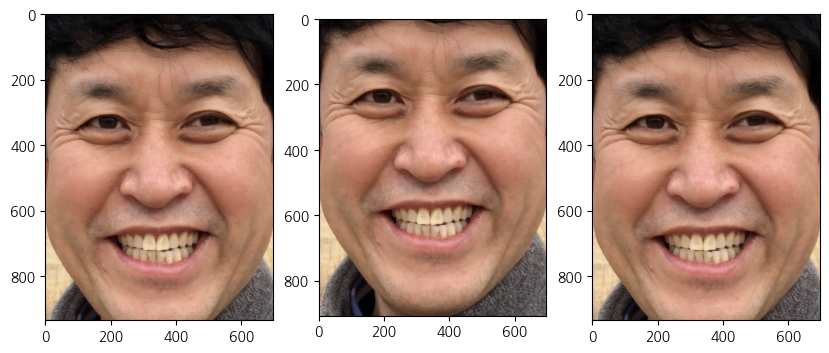

In [60]:
fig = plt.figure(figsize = (10,10))
# img = pil.open(TRAIN_IMG_PATH + 'happy/' + df['filename'][0]).convert('RGB')
# img = ImageOps.exif_transpose(img)

img = cv2.imread(TRAIN_IMG_PATH + 'happy/' + df['filename'][0])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#print(img)

plt.subplot(1,3,1)
#plt.imshow(img.crop((df['annot_A.boxes.minX'][0], df['annot_A.boxes.minY'][0], df['annot_A.boxes.maxX'][0], df['annot_A.boxes.maxY'][0])))
plt.imshow(img[int(df['annot_A.boxes.minY'][0]):int(df['annot_A.boxes.maxY'][0]), int(df['annot_A.boxes.minX'][0]):int(df['annot_A.boxes.maxX'][0])])

plt.subplot(1,3,2)
#plt.imshow(img.crop((df['annot_B.boxes.minX'][0], df['annot_B.boxes.minY'][0], df['annot_B.boxes.maxX'][0], df['annot_B.boxes.maxY'][0])))
plt.imshow(img[int(df['annot_B.boxes.minY'][0]):int(df['annot_B.boxes.maxY'][0]), int(df['annot_B.boxes.minX'][0]):int(df['annot_B.boxes.maxX'][0])])

plt.subplot(1,3,3)
#plt.imshow(img.crop((df['annot_C.boxes.minX'][0], df['annot_C.boxes.minY'][0], df['annot_C.boxes.maxX'][0], df['annot_C.boxes.maxY'][0])))
plt.imshow(img[int(df['annot_C.boxes.minY'][0]):int(df['annot_C.boxes.maxY'][0]), int(df['annot_C.boxes.minX'][0]):int(df['annot_C.boxes.maxX'][0])])

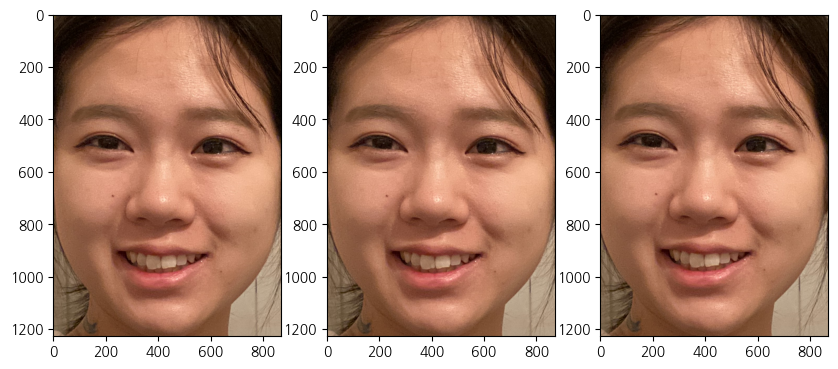

In [61]:
fig = plt.figure(figsize = (10,30))

ii = random.randint(0,1495)
img = pil.open(TRAIN_IMG_PATH + 'happy/' + df['filename'][ii]).convert('RGB')
img = ImageOps.exif_transpose(img)

plt.subplot(1,3,1)
plt.imshow(img.crop((df['annot_A.boxes.minX'][ii], df['annot_A.boxes.minY'][ii], df['annot_A.boxes.maxX'][ii], df['annot_A.boxes.maxY'][ii])))
plt.subplot(1,3,2)
plt.imshow(img.crop((df['annot_B.boxes.minX'][ii], df['annot_B.boxes.minY'][ii], df['annot_B.boxes.maxX'][ii], df['annot_B.boxes.maxY'][ii])))
plt.subplot(1,3,3)
plt.imshow(img.crop((df['annot_C.boxes.minX'][ii], df['annot_C.boxes.minY'][ii], df['annot_C.boxes.maxX'][ii], df['annot_C.boxes.maxY'][ii])))

In [62]:
img.size

(4032, 3024)

In [63]:
df_label.head(5)

,Unnamed: 0,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,0,1ssf46b4695747c6e323bf090389b57049cff58a0851d5...,1,50,0,0,0,2080.465000,1655.189800,1383.671900,...,1383.671900,815.226836,기쁨,실외 자연환경,2080.46500,1655.189800,1383.67190,719.384700,기쁨,실외 자연환경
1,1,hfbl2d0622517ad6ef5456d1fa4e7d52f57ff1dff32094...,1,20,0,0,0,937.669830,822.907783,471.411790,...,471.302790,279.082133,기쁨,실외 자연환경,935.07283,824.604783,472.94479,275.735134,기쁨,실외 자연환경
2,2,eg9e62a9cfcd9eabbe75c79dd12d99e99cdd9960ba9daf...,0,20,1,0,0,1797.952500,1115.873500,1171.371700,...,1185.662855,309.106598,기쁨,실외 자연환경,1797.95250,1115.873500,1171.37170,317.707340,기쁨,실외 자연환경
3,3,w0l5595485285b029508299b09d058cb30ebcd29459c52...,1,20,0,0,1,1663.261855,1579.161600,840.119455,...,849.155188,550.287645,기쁨,교통/이동수단(엘리베이터 포함),1659.03740,1535.617000,807.66656,527.568540,기쁨,교통/이동수단(엘리베이터 포함)
4,4,4g3x46eb8169fa9c636ecfe93eac6996299ca02d6596c3...,0,30,1,0,2,1927.386601,1539.205364,1065.494209,...,1077.014106,282.111354,기쁨,공공시설/종교/의료,1915.33250,1536.345800,1095.86410,338.723700,기쁨,상업시설/점포/시장


## 이상치 탐색 및 처리

In [64]:
# filenames = list(df_label['filename'])
# emotions = list(df_label['faceExp_uploader'])   #train

In [65]:
filenames = list(df_val_label['filename'])
emotions = list(df_val_label['faceExp_uploader'])

In [66]:
length_x = []
length_y = []

In [67]:
# for i in tqdm(range(len(filenames))):
#     emotion = ""
#     if emotions[i] == 0:
#         emotion += 'happy'
#     elif emotions[i] == 1:
#         emotion += 'anger'
#     elif emotions[i] == 2:
#         emotion += 'sadness'
#     elif emotions[i] == 3:
#         emotion += 'panic'
#     else:
#         print('NOT SUPPORTED EMOTION')
#         continue

#     img = cv2.imread(TRAIN_IMG_PATH + emotion + '/' + filenames[i])
#     length_y.append(img.shape[0])
#     length_x.append(img.shape[1])

#     del emotion

## 주의! length val용으로 따로 만들고 아래 반복문 내에서 수정하기

In [68]:
for i in tqdm(range(len(filenames))):
    emotion = ""
    if emotions[i] == 0:
        emotion += 'happy'
    elif emotions[i] == 1:
        emotion += 'anger'
    elif emotions[i] == 2:
        emotion += 'sadness'
    elif emotions[i] == 3:
        emotion += 'panic'
    else:
        print('NOT SUPPORTED EMOTION')
        continue

    img = cv2.imread(VALID_IMG_PATH + emotion + '/' + filenames[i])
    length_y.append(img.shape[0])
    length_x.append(img.shape[1])

    del emotion

100%|██████████| 1200/1200 [21:48<00:00,  1.09s/it]


In [69]:
# df_label['lenX'] = length_x
# df_label['lenY'] = length_y

In [70]:
df_val_label['lenX'] = length_x
df_val_label['lenY'] = length_y

In [71]:
cols = ['filename', 'faceExp_uploader','annot_A.boxes.minY', 'annot_A.boxes.maxY', 'annot_A.boxes.minX', 'annot_A.boxes.maxX']

In [72]:
# df[(df['annot_A.boxes.minX']<0) | (df['annot_A.boxes.minY']<0) | (df['annot_A.boxes.maxX']<50) | (df['annot_A.boxes.maxY']<50) | (df['annot_A.boxes.maxX']-df['annot_A.boxes.minX']<50) | (df['annot_A.boxes.maxY']-df['annot_A.boxes.minY']<100) | (df_label['lenY'] - df['annot_A.boxes.maxY']<100) | (df_label['lenX'] - df['annot_A.boxes.maxX']<50)][cols]

In [73]:
df_val_label[(df_val_label['annot_A.boxes.minX']<0) | (df_val_label['annot_A.boxes.minY']<0) | (df_val_label['annot_A.boxes.maxX']<50) | (df_val_label['annot_A.boxes.maxY']<50) | (df_val_label['annot_A.boxes.maxX']-df_val_label['annot_A.boxes.minX']<50) | (df_val_label['annot_A.boxes.maxY']-df_val_label['annot_A.boxes.minY']<100) | (df_val_label['lenY'] - df_val_label['annot_A.boxes.maxY']<100) | (df_val_label['lenX'] - df_val_label['annot_A.boxes.maxX']<50)][cols]

,filename,faceExp_uploader,annot_A.boxes.minY,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.maxX
28,r1z0f2e4618fd5abdb2dd1abb4daa07639f806bad87235...,1,228.054318,1332.636543,1125.064851,1880.334729
66,bkgj33a59b95a5dea4e9d08d4555035d2ad983d4569fe6...,1,9.315338,1203.423700,2293.655000,3240.048800
120,xelqc69f6c79716cc916f1fc0389b3f18193c9d4c38f6f...,1,777.501400,1852.013200,2101.022000,2944.000000
242,njl141551ad1ab1abba4bdd84b5bd91fa4a1a891aff53b...,1,348.496370,1359.680800,1184.244100,1898.629400
415,ui78ea71f401d3b344725945fb49e16e52d21b145ef165...,2,215.764770,1649.424200,953.910030,1948.247800
421,uxtp7ddcd77ddac31cccb01debeb5724737d68dbde5793...,2,563.731564,1032.541272,317.090408,743.534773
468,bu0rff5d50988270549905c4f5b4857ac27a55d1c5aaf1...,2,172.089194,1210.379708,2254.419400,3088.000000
549,z4uue3da6e3c539c560b2e0c4d7a782c9dbad6872e5cae...,2,489.164800,1084.435200,270.076972,726.870572
600,5wvv711e387717375fc2d050c253bddc47f702574e5d4e...,3,294.916700,1424.255700,1812.733900,2669.370000
646,4moraab01b5f11eaadae4b1d1af48dd80e6f6ab6fad414...,3,288.088400,1299.723300,1219.740700,1955.481800


In [74]:
cols = ['filename', 'faceExp_uploader','annot_B.boxes.minY', 'annot_B.boxes.maxY', 'annot_B.boxes.minX', 'annot_B.boxes.maxX']

In [75]:
# df[(df['annot_B.boxes.minX']<0) | (df['annot_B.boxes.minY']<0) | (df['annot_B.boxes.maxX']<50) | (df['annot_B.boxes.maxY']<50) | (df['annot_B.boxes.maxX']-df['annot_B.boxes.minX']<50) | (df['annot_B.boxes.maxY']-df['annot_B.boxes.minY']<50) | (df_label['lenY'] - df['annot_B.boxes.maxY']<100) | (df_label['lenX'] - df['annot_B.boxes.maxX']<50)][cols]

In [76]:
df_val_label[(df_val_label['annot_B.boxes.minX']<0) | (df_val_label['annot_B.boxes.minY']<0) | (df_val_label['annot_B.boxes.maxX']<50) | (df_val_label['annot_B.boxes.maxY']<50) | (df_val_label['annot_B.boxes.maxX']-df_val_label['annot_B.boxes.minX']<50) | (df_val_label['annot_B.boxes.maxY']-df_val_label['annot_B.boxes.minY']<100) | (df_val_label['lenY'] - df_val_label['annot_B.boxes.maxY']<100) | (df_val_label['lenX'] - df_val_label['annot_B.boxes.maxX']<50)][cols]

,filename,faceExp_uploader,annot_B.boxes.minY,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.maxX
28,r1z0f2e4618fd5abdb2dd1abb4daa07639f806bad87235...,1,234.816790,1314.532287,1127.672193,1863.312322
112,p94456b22632775772cbdc04423c5b1ce41d7629631551...,1,220.248410,1198.444300,813.032530,1507.265000
120,xelqc69f6c79716cc916f1fc0389b3f18193c9d4c38f6f...,1,777.501400,1852.013200,2101.022000,2944.000000
159,egulf41dbdae0d4bf1fe99a44d3b78b468bbeafbbebbd4...,1,246.669066,1277.755680,1216.088927,1944.972599
242,njl141551ad1ab1abba4bdd84b5bd91fa4a1a891aff53b...,1,348.496370,1359.680800,1184.244100,1898.629400
270,hy2q4c38c2382e5d6a92b25dc6b24b65e894653722ed8d...,1,290.357678,1204.069632,501.512347,1228.011553
351,ctepd3edae10296ba9d461ce95c363dbb4180198063c6c...,2,449.975370,995.540100,314.061500,720.793900
421,uxtp7ddcd77ddac31cccb01debeb5724737d68dbde5793...,2,511.821429,1048.732143,317.573003,744.148537
447,wdhj83385cb16d071f1c0125deaf6102c3109accb902a3...,2,816.828468,1660.308753,2129.593128,3217.870830
468,bu0rff5d50988270549905c4f5b4857ac27a55d1c5aaf1...,2,172.300280,1265.123300,2254.419400,3088.000000


In [77]:
cols = ['filename', 'faceExp_uploader','annot_C.boxes.minY', 'annot_C.boxes.maxY', 'annot_C.boxes.minX', 'annot_C.boxes.maxX']

In [78]:
# df[(df['annot_C.boxes.minX']<0) | (df['annot_C.boxes.minY']<0) | (df['annot_C.boxes.maxX']<50) | (df['annot_C.boxes.maxY']<50) | (df['annot_C.boxes.maxX']-df['annot_C.boxes.minX']<50) | (df['annot_C.boxes.maxY']-df['annot_C.boxes.minY']<50) | (df_label['lenY'] - df['annot_C.boxes.maxY']<100) | (df_label['lenX'] - df['annot_C.boxes.maxX']<50)][cols]

In [79]:
df_val_label[(df_val_label['annot_C.boxes.minX']<0) | (df_val_label['annot_C.boxes.minY']<0) | (df_val_label['annot_C.boxes.maxX']<50) | (df_val_label['annot_C.boxes.maxY']<50) | (df_val_label['annot_C.boxes.maxX']-df_val_label['annot_C.boxes.minX']<50) | (df_val_label['annot_C.boxes.maxY']-df_val_label['annot_C.boxes.minY']<100) | (df_val_label['lenY'] - df_val_label['annot_C.boxes.maxY']<100) | (df_val_label['lenX'] - df_val_label['annot_C.boxes.maxX']<50)][cols]

,filename,faceExp_uploader,annot_C.boxes.minY,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.maxX
28,r1z0f2e4618fd5abdb2dd1abb4daa07639f806bad87235...,1,228.059987,1335.187334,1097.029500,1880.243500
66,bkgj33a59b95a5dea4e9d08d4555035d2ad983d4569fe6...,1,9.315338,1203.423700,2293.655000,3240.048800
112,p94456b22632775772cbdc04423c5b1ce41d7629631551...,1,220.248410,1198.444300,813.032530,1507.265000
120,xelqc69f6c79716cc916f1fc0389b3f18193c9d4c38f6f...,1,777.501400,1852.013200,2101.022000,2944.000000
159,egulf41dbdae0d4bf1fe99a44d3b78b468bbeafbbebbd4...,1,224.468134,1282.296063,1215.343049,1950.323549
242,njl141551ad1ab1abba4bdd84b5bd91fa4a1a891aff53b...,1,348.496370,1359.680800,1184.244100,1898.629400
270,hy2q4c38c2382e5d6a92b25dc6b24b65e894653722ed8d...,1,323.707000,1204.159800,501.456540,1211.358500
351,ctepd3edae10296ba9d461ce95c363dbb4180198063c6c...,2,449.975370,995.540100,314.061500,720.793900
415,ui78ea71f401d3b344725945fb49e16e52d21b145ef165...,2,215.764770,1649.424200,953.910030,1948.247800
421,uxtp7ddcd77ddac31cccb01debeb5724737d68dbde5793...,2,517.956471,1044.215271,308.626038,744.393573


In [80]:
# df_coordi = df_label.copy()

In [81]:
df_val_coordi = df_val_label.copy()

## 좌표 대푯값 설정

In [82]:
box_cols_minX = ['annot_A.boxes.minX', 'annot_B.boxes.minX', 'annot_C.boxes.minX']
box_cols_maxX = ['annot_A.boxes.maxX', 'annot_B.boxes.maxX', 'annot_C.boxes.maxX']
box_cols_minY = ['annot_A.boxes.minY', 'annot_B.boxes.minY', 'annot_C.boxes.minY']
box_cols_maxY = ['annot_A.boxes.maxY', 'annot_B.boxes.maxY', 'annot_C.boxes.maxY']

In [83]:
box_cols = box_cols_minX + box_cols_maxX + box_cols_minY +box_cols_maxY

In [84]:
# for col in box_cols:
#     df_coordi.loc[df[col] < 0,col]=0

In [85]:
for col in box_cols:
    df_val_coordi.loc[df[col] < 0,col]=0

In [86]:
# df_coordi['minX'] = df_coordi[box_cols_minX].median(axis=1)
# df_coordi['maxX'] = df_coordi[box_cols_maxX].median(axis=1)
# df_coordi['minY'] = df_coordi[box_cols_minY].median(axis=1)
# df_coordi['maxY'] = df_coordi[box_cols_maxY].median(axis=1)

In [87]:
df_val_coordi['minX'] = df_val_coordi[box_cols_minX].median(axis=1)
df_val_coordi['maxX'] = df_val_coordi[box_cols_maxX].median(axis=1)
df_val_coordi['minY'] = df_val_coordi[box_cols_minY].median(axis=1)
df_val_coordi['maxY'] = df_val_coordi[box_cols_maxY].median(axis=1)

In [88]:
# df_coordi['face.X'] = (df_coordi['maxX']/2 + df_coordi['minX']/2)
# df_coordi['face.Y'] = (df_coordi['maxY']/2 + df_coordi['minY']/2)

In [89]:
df_val_coordi['face.X'] = (df_val_coordi['maxX']/2 + df_val_coordi['minX']/2)
df_val_coordi['face.Y'] = (df_val_coordi['maxY']/2 + df_val_coordi['minY']/2)

In [90]:
# df_coordi = df_coordi.drop(box_cols_minX, axis=1)
# df_coordi = df_coordi.drop(box_cols_maxX, axis=1)
# df_coordi = df_coordi.drop(box_cols_minY, axis=1)
# df_coordi = df_coordi.drop(box_cols_maxY, axis=1)
# df_coordi = df_coordi.drop('Unnamed: 0', axis=1)

In [91]:
df_val_coordi = df_val_coordi.drop(box_cols_minX, axis=1)
df_val_coordi = df_val_coordi.drop(box_cols_maxX, axis=1)
df_val_coordi = df_val_coordi.drop(box_cols_minY, axis=1)
df_val_coordi = df_val_coordi.drop(box_cols_maxY, axis=1)
df_val_coordi = df_val_coordi.drop('Unnamed: 0', axis=1)

In [92]:
# df_coordi.sample(5)

In [93]:
df_val_coordi.sample(5)

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.faceExp,annot_A.bg,annot_B.faceExp,annot_B.bg,annot_C.faceExp,annot_C.bg,lenX,lenY,minX,maxX,minY,maxY,face.X,face.Y
395,qvyx0f85ae92c9c3200fa469edc101dccaed9600780f64...,1,20,1,2,1,슬픔,공공시설/종교/의료,슬픔,공공시설/종교/의료,슬픔,공공시설/종교/의료,3264,2448,1672.215897,2601.907134,193.961118,1446.684193,2137.061516,820.322655
136,meusddbc0930d75fab3a531bbaca17d0d14d7088727d04...,0,20,1,1,1,분노,도심 환경,불안,교통/이동수단(엘리베이터 포함),분노,교통/이동수단(엘리베이터 포함),2640,1980,755.784200,1462.386100,445.914400,1467.793100,1109.085150,956.853750
818,1hmub21b5a50fad755702fff7a5c8e4de7c7381e4682a5...,1,40,1,3,0,상처,오락/공연시설,중립,숙박 및 거주공간,상처,오락/공연시설,1333,1000,516.932300,848.829200,126.450700,563.057740,682.880750,344.754220
386,juwza3a85cb7efaa50c4b6f7ae0f482fcb5aecef1cee82...,1,30,1,2,0,슬픔,실외 자연환경,상처,실외 자연환경,상처,실외 자연환경,4032,3024,1265.641883,2152.165700,974.771806,2183.195364,1708.903791,1578.983585
448,vt7td4afc4db497ac071e19c964996cb94955c94698b99...,1,20,0,2,3,슬픔,도심 환경,슬픔,도심 환경,슬픔,도심 환경,2560,1920,369.773971,1018.799901,345.876857,1162.849157,694.286936,754.363007


In [94]:
# df_coordi.to_csv(CSV_PATH + 'train_ver3.csv')

In [95]:
df_val_coordi.to_csv(CSV_PATH + 'valid_ver3.csv')

In [96]:
cols = ['filename', 'faceExp_uploader','minY', 'maxY', 'minX', 'maxX']

In [97]:
# df_strange = df_coordi[(df_coordi['minX']<=0) | (df_coordi['minY']<=0) | (df_coordi['maxX']<50) | (df_coordi['maxY']<50) | (df_coordi['maxX']-df_coordi['minX']<50) | (df_coordi['maxY']-df_coordi['minY']<100) | (df_coordi['lenY'] - df_coordi['maxY']<100) | (df_coordi['lenX'] - df_coordi['maxX']<50)][cols]

In [98]:
df_val_strange = df_val_coordi[(df_val_coordi['minX']<=0) | (df_val_coordi['minY']<=0) | (df_val_coordi['maxX']<50) | (df_val_coordi['maxY']<50) | (df_val_coordi['maxX']-df_val_coordi['minX']<50) | (df_val_coordi['maxY']-df_val_coordi['minY']<100) | (df_val_coordi['lenY'] - df_val_coordi['maxY']<100) | (df_val_coordi['lenX'] - df_val_coordi['maxX']<50)][cols]

In [99]:
# len(df_strange)

In [100]:
len(df_val_strange)

37

In [101]:
# fig = plt.figure(figsize = (30,30))
# index = 1
# for i in df_strange.index:
#     emotion = ""
#     if df_strange['faceExp_uploader'][i] == 0:
#         emotion += 'happy'
#     elif df_strange['faceExp_uploader'][i] == 1:
#         emotion += 'anger'
#     elif df_strange['faceExp_uploader'][i] == 2:
#         emotion += 'sadness'
#     elif df_strange['faceExp_uploader'][i] == 3:
#         emotion += 'panic'
#     img = cv2.imread(TRAIN_IMG_PATH + emotion + '/' + df_strange['filename'][i])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.gca().set_title(i)
#     plt.subplot(12,12,index)
#     plt.imshow(img[int(df_strange['minY'][i]):int(df_strange['maxY'][i]), int(df_strange['minX'][i]):int(df_strange['maxX'][i])])
#     index += 1

<ipython-input-102-315d24f2efd8>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(12,12,index)


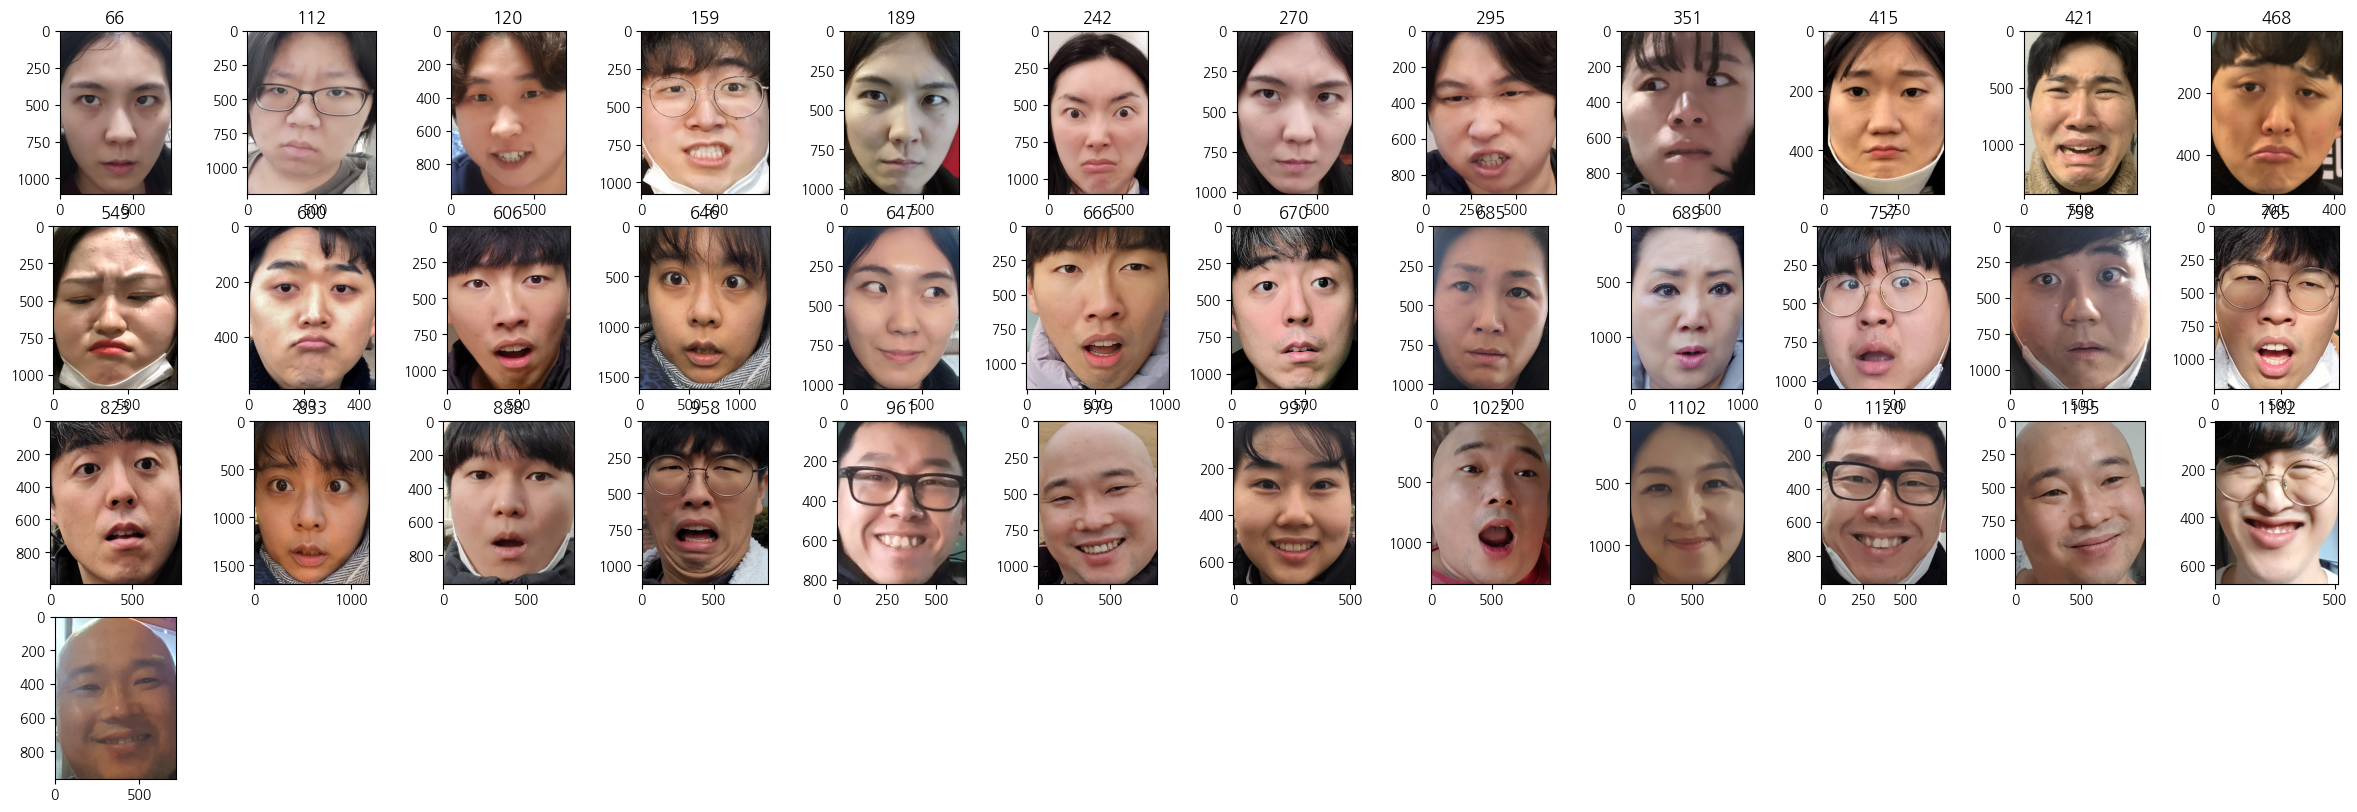

In [102]:
fig = plt.figure(figsize = (30,30))
index = 1
for i in df_val_strange.index:
    emotion = ""
    if df_val_strange['faceExp_uploader'][i] == 0:
        emotion += 'happy'
    elif df_val_strange['faceExp_uploader'][i] == 1:
        emotion += 'anger'
    elif df_val_strange['faceExp_uploader'][i] == 2:
        emotion += 'sadness'
    elif df_val_strange['faceExp_uploader'][i] == 3:
        emotion += 'panic'
    img = cv2.imread(VALID_IMG_PATH + emotion + '/' + df_val_strange['filename'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.gca().set_title(i)
    plt.subplot(12,12,index)
    plt.imshow(img[int(df_val_strange['minY'][i]):int(df_val_strange['maxY'][i]), int(df_val_strange['minX'][i]):int(df_val_strange['maxX'][i])])
    index += 1

In [103]:
# len(df_coordi)

In [104]:
len(df_val_strange)

37

In [105]:
# df_coordi = df_coordi.drop(df_coordi[df_coordi['filename']=='vag7dfda5e3b9561fd12c1175d277b1d2c1f22dd2a5d37b3286dd4b3e2d45pili.jpg'].index, axis=0)
# df_coordi = df_coordi.drop(df_coordi[df_coordi['filename']=='k3s935e50e666fee414ce63c6a7cc0563dbee792014b083a74cbcbf602b735rqt.jpg'].index, axis=0)

In [106]:
# len(df_coordi)

In [107]:
# df_coordi.to_csv(CSV_PATH + 'train_ver3.csv')

In [108]:
# df_coordi

In [109]:
# df_coordi.reset_index(drop=True)

In [110]:
# df_val_coordi.reset_index(drop=True)

In [111]:
# df_coordi.to_csv(CSV_PATH + 'train_ver3.csv')

In [113]:
df_val_coordi.to_csv(CSV_PATH + 'valid_ver3.csv')